## **1. CONVOLUTIONAL NEURAL NETWORK (CNN) MODEL**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from tensorflow.keras.constraints import unit_norm
from tensorflow.python.keras import regularizers


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import os
import cv2
import random
import time
import pickle

SEED = 0

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
  
def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [3]:
# load pickle files X and y

X = pickle.load(open("/content/gdrive/MyDrive/Colab Notebooks/sports_and_recreations_runs/X_256.pickle", "rb"))
y = pickle.load(open("/content/gdrive/MyDrive/Colab Notebooks/sports_and_recreations_runs/y_256.pickle", "rb"))
categories = pickle.load(open("/content/gdrive/MyDrive/Colab Notebooks/sports_and_recreations_runs/categories.pickle", "rb"))

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
num_classes = len(categories)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14592, 256, 256, 1)
(14592, 43)
(6255, 256, 256, 1)
(6255, 43)


In [5]:
def print_graphs(model_history):
     # summarize history for loss
    plt.plot(model_history.history['loss'], color='orange')
    plt.plot(model_history.history['val_loss'], color='blue')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss', 'Validation loss'], loc='upper left')
    plt.show()
    
    # summarize history for accuracy
    plt.plot(model_history.history['accuracy'], color='orange')
    plt.plot(model_history.history['val_accuracy'], color='blue')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper left')
    plt.show()

## **1.2. MODEL 1**

In [6]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 262144)            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              268436480 
_________________________________________________________________
dense_1 (Dense)              (None, 43)                4

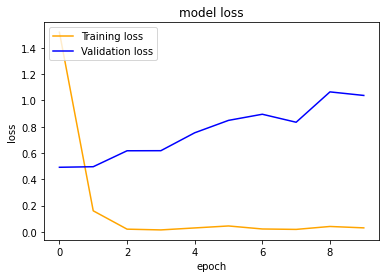

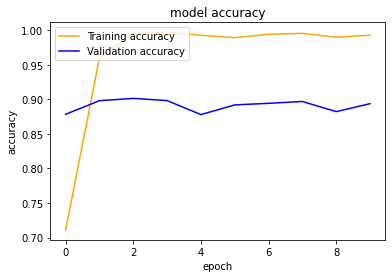

In [7]:
print_graphs(history_cnn)

## **1.3. MODEL 2**

In [8]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

import time
start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              268436480 
_________________________________________________________________
dense_3 (Dense)              (None, 43)               

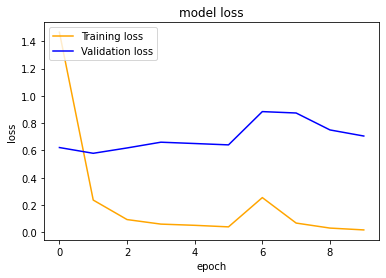

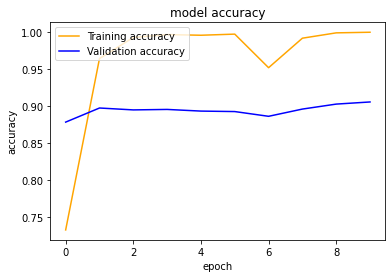

In [9]:
print_graphs(history_cnn)

## **1.4. MODEL 3**

In [10]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', kernel_initializer='he_normal', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              268436480 
_________________________________________________________________
dense_5 (Dense)              (None, 43)               

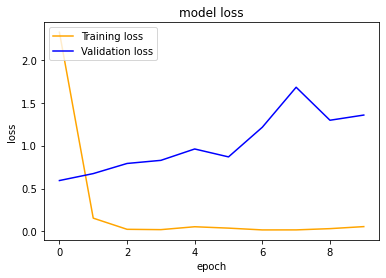

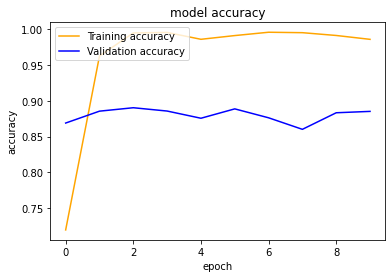

In [11]:
print_graphs(history_cnn)

## **1.5. MODEL 4**

In [12]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', kernel_initializer='he_normal', activation='relu'))
cnn.add(MaxPooling2D())

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
cnn.add(MaxPooling2D())

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 262144)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              268436480 
_________________________________________________________________
dense_7 (Dense)              (None, 43)               

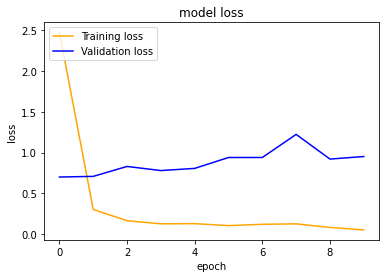

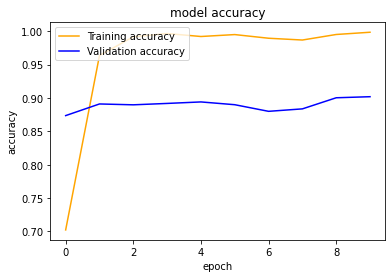

In [13]:
print_graphs(history_cnn)

## **1.6. MODEL 5**

In [7]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

import time
start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 262144)           

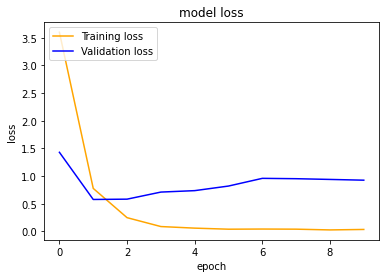

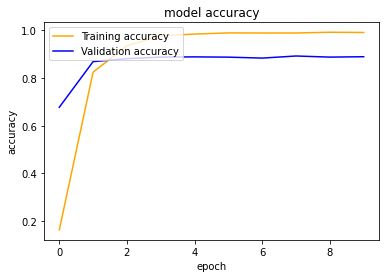

In [8]:
print_graphs(history_cnn)

## **1.7. MODEL 6**

In [9]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', kernel_initializer='he_normal', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=5, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 262144)           

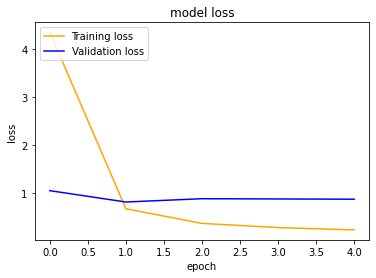

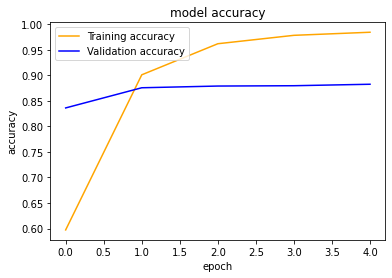

In [10]:
print_graphs(history_cnn)

## **1.8. MODEL 7**

In [11]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', kernel_initializer='he_normal', activation='relu', kernel_constraint=unit_norm()))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())


start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 262144)           

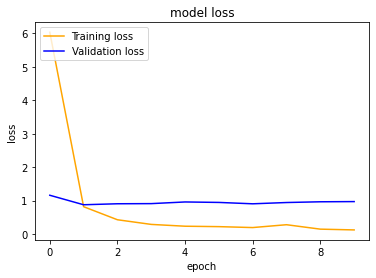

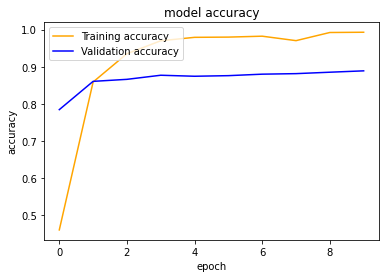

In [12]:
print_graphs(history_cnn)

## **1.9. MODEL 8**

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=X.shape[1:], padding='same', kernel_initializer='he_normal', activation='relu', kernel_constraint=unit_norm()))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

import time
start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 64)      51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 262144)           

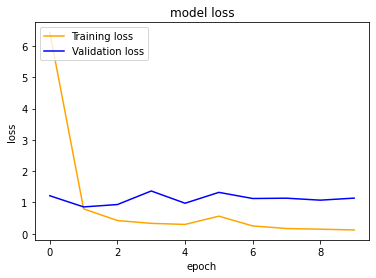

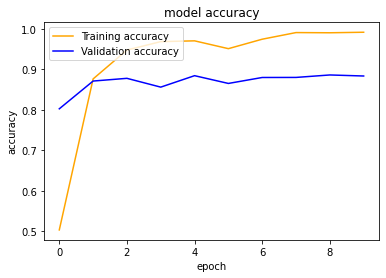

In [ ]:
print_graphs(history_cnn)

## **1.9. MODEL 10**

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), input_shape=X.shape[1:], padding='same', kernel_initializer='he_normal', activation='relu', kernel_constraint=unit_norm()))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
cnn.add(MaxPooling2D())
cnn.add(Dropout(0.4))

cnn.add(Flatten())
cnn.add(Dense(1024, activation='relu'))

cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

print(cnn.summary())

import time
start = time.time()
history_cnn = cnn.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
end = time.time()
print('Time elapsed: {}s'.format(end-start))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 262144)           

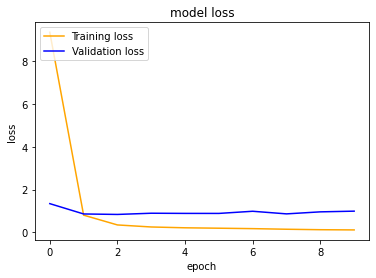

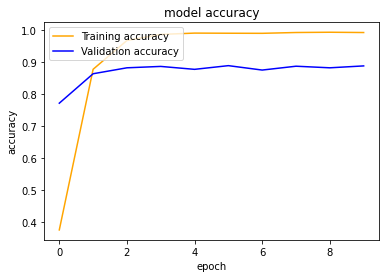

In [ ]:
print_graphs(history_cnn)

### Saving model 10

In [ ]:
# cnn.save('/content/gdrive/MyDrive/Colab Notebooks/sports_and_recreations_runs/models/sports_and_recreation_256_model.h5')